Seeding for Reproducibility

In [1]:
#Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
!pip install kaggle

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [8]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [9]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['segmented', 'color', 'grayscale']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Early_blight']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Early_blight']
38
['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Apple___Cedar_apple_rust', 'Corn_(maize)___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Early_blight']


Number of classes = 38

In [10]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['97c0552c-1cd6-4813-9608-3735b9867f98___Mt.N.V_HL 6046.JPG', '0ac4ff49-7fbf-4644-98a4-4dc596e2fa87___Mt.N.V_HL 9004.JPG', 'da331356-edd4-4803-9347-412929330c11___Mt.N.V_HL 6142.JPG', '9466c0cc-2ae1-429e-b07e-eb75b94b2cf9___Mt.N.V_HL 9080.JPG', 'd7630b13-7701-436c-82c4-0a9a8248d6ee___Mt.N.V_HL 6187.JPG']


In [11]:
#daataset path
base = "plantvillage dataset/color"

(256, 256, 3)


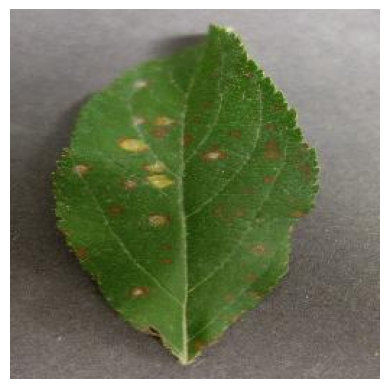

In [12]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/052e3deb-0499-4685-bc39-cea7f1df0700___FREC_C.Rust 3742.JPG'
img = mpimg.imread(image_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
#image param
img_size = 224
batch_size = 32

Train Test Split

In [14]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [15]:
#train generator
train_gen = data_gen.flow_from_directory(
    base,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [16]:
#validation generator
val_gen = data_gen.flow_from_directory(
    base,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


CNN

In [17]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_gen.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Training

In [20]:
history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=5,
    validation_data=val_gen,
    validation_steps=val_gen.samples // batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6002 - loss: 1.6322

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 83ms/step - accuracy: 0.6003 - loss: 1.6317 - val_accuracy: 0.8635 - val_loss: 0.4437
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 120s 71ms/step - accuracy: 0.9210 - loss: 0.2563 - val_accuracy: 0.8818 - val_loss: 0.3809
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 98s 72ms/step - accuracy: 0.9665 - loss: 0.1043 - val_accuracy: 0.8817 - val_loss: 0.4397
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 72ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.8776 - val_loss: 0.5176
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 78ms/step - accuracy: 0.9848 - loss: 0.0529 - val_accuracy: 0.8823 - val_loss: 0.5658


In [21]:
#model eval
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc *100:.2f}%")

340/340 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8783 - loss: 0.5784
Validation Loss: 0.5657868981361389, Validation Accuracy: 88.23%


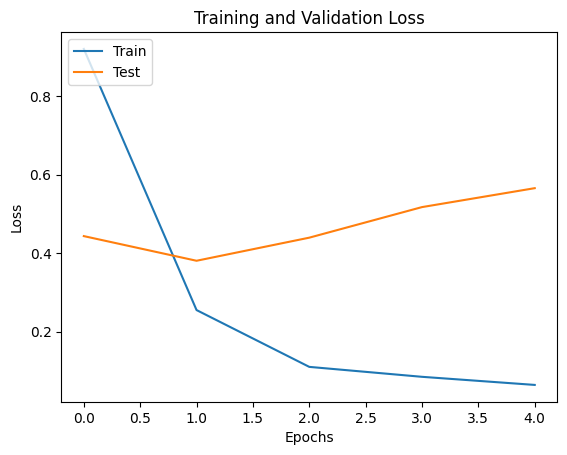

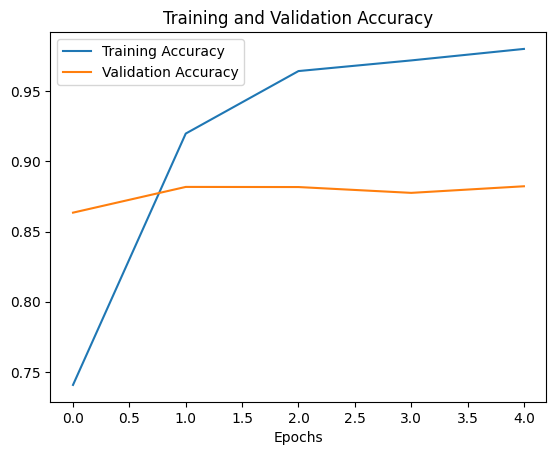

In [22]:
#plot training and val loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot training and val acc
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='lower left')
plt.legend()
plt.show()

Building a predictive system

In [31]:
#function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  img = Image.open(image_path)
  img = img.resize((img_size, img_size))
  img_array = np.array(img)
  img_array = np.expand_dims(img_array, axis =0)
  img_array = img_array.astype('float32')/255
  return img_array

def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  prediction = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(prediction, axis=1)[0]
  predicted_class = list(class_indices.keys())[predicted_class_index]
  return predicted_class


In [32]:
#mapping from class indices to class names
class_indices = {v: k for k, v in train_gen.class_indices.items()}

In [33]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

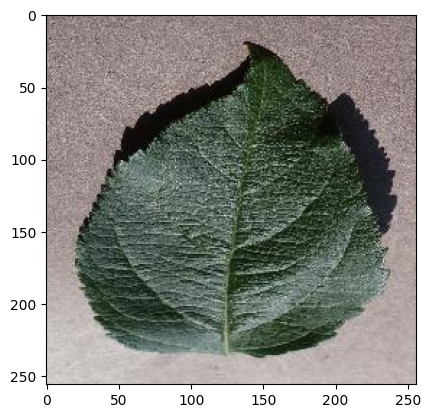

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class: 3


In [36]:
#example usage
image_path = '/content/plantvillage dataset/color/Apple___healthy/00907d8b-6ae6-4306-bfd7-d54471981a86___RS_HL 5709.JPG'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.show()
predicted_class = predict_image_class(model, image_path, class_indices)
print(f"Predicted Class: {predicted_class}")

In [38]:
model.save('/content/plant_model.h5')